In [10]:
import numpy as np
import pandas as pd
from Freezer import getMyPosition as getPosition
import seaborn as sns
import matplotlib.pyplot as plt

nInst = 0
nt = 0

# Commission rate
commRate = 0.0025 # was 0.0050

# Dollar position limit (maximum absolute dollar value of any individual stock position)
dlrPosLimit = 10000

timeOut=600 

pricesFile="./prices.txt"
prcAll = df=pd.read_csv(pricesFile, sep='\s+', header=None, index_col=None)

In [5]:
y_s = [i for i in range(250)]
prcNormalized = pd.DataFrame()
for i in range(100):
    prcNormalized[i] = (prcAll[i] - prcAll[i].min())/(prcAll[i].max() - prcAll[i].min())
prcNormalized


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.070461,0.939759,0.959677,0.469298,0.574359,0.730353,0.935323,0.987928,0.878187,0.421875,...,0.709261,0.978417,0.983051,0.867596,0.969278,0.973856,0.828402,0.971014,0.502488,0.470037
1,0.108401,0.915663,0.971774,0.425439,0.502564,0.707282,0.950249,1.000000,0.832861,0.343750,...,0.730363,0.971223,0.971751,0.836237,1.000000,0.973856,0.869822,0.992754,0.517413,0.493446
2,0.092141,0.939759,1.000000,0.407895,0.579487,0.759193,0.975124,0.983903,0.878187,0.593750,...,0.683470,0.992806,0.994350,0.811847,0.978495,0.980392,0.863905,1.000000,0.497512,0.537453
3,0.078591,0.963855,0.983871,0.429825,0.558974,0.802451,0.980100,0.959759,0.903683,0.531250,...,0.689332,1.000000,1.000000,0.794425,0.926267,1.000000,0.899408,0.985507,0.691542,0.541199
4,0.013550,0.951807,0.963710,0.416667,0.779487,0.828407,1.000000,0.981891,0.997167,0.562500,...,0.763189,0.985612,0.983051,0.864111,0.909370,1.000000,0.940828,0.985507,0.721393,0.485955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.981030,0.012048,0.000000,0.223684,0.430769,0.335977,0.009950,0.044266,0.237960,0.445312,...,0.235639,0.064748,0.022599,0.101045,0.092166,0.000000,0.000000,0.021739,0.810945,0.210674
246,1.000000,0.012048,0.008065,0.228070,0.276923,0.377794,0.014925,0.014085,0.257790,0.390625,...,0.229777,0.086331,0.011299,0.083624,0.046083,0.006536,0.023669,0.021739,0.870647,0.212547
247,0.943089,0.024096,0.020161,0.267544,0.287179,0.395097,0.044776,0.020121,0.198300,0.304688,...,0.277843,0.086331,0.028249,0.024390,0.010753,0.006536,0.041420,0.028986,0.771144,0.186330
248,0.929539,0.024096,0.040323,0.271930,0.076923,0.389329,0.099502,0.024145,0.189802,0.335937,...,0.242673,0.107914,0.056497,0.000000,0.044547,0.019608,0.059172,0.021739,0.870647,0.279963


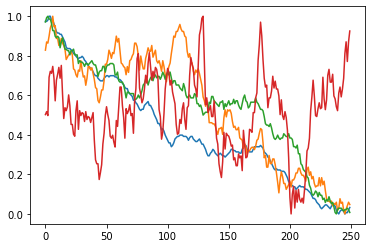

In [31]:
for i in range(95,99):
    x_s = prcNormalized[i]
    plt.plot(y_s, x_s)

In [45]:
corr = pd.DataFrame()
minCorr = 1
minPair = (0,0)
for i in range(100):
    newCorr = []
    for j in range(100):
        curCorr = prcNormalized[i].corr(prcNormalized[j])
        if abs(curCorr) < minCorr:
            minCorr = abs(curCorr)
            minPair = (i,j)
        newCorr.append(curCorr)
    corr[i] = pd.Series(newCorr)


In [109]:
VAT = []
mapping = {}
start = 19
I, J = set(), set()
for i in range(100):
    J.add(i)
J.remove(start)
I.add(start)
VAT.append(start)
mapping[0] = start
for i in range(1,100):
    maxCorr = 0
    maxPoint = 0
    for p1 in I:
        for p2 in J:
            if abs(corr[p1][p2]) > maxCorr:
                maxCorr = abs(corr[p1][p2])
                maxPoint = p2
    J.remove(maxPoint)
    I.add(maxPoint)
    VAT.append(maxPoint)
    mapping[i] = maxPoint
clusteredCorr = pd.DataFrame()
for i in range(100):
    newCorr = []
    for j in range(100):
        newCorr.append(abs(corr[VAT[i]][VAT[j]]))
    clusteredCorr[i] = pd.Series(newCorr)




<AxesSubplot:>

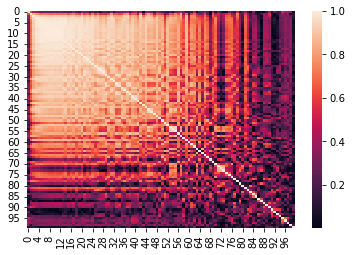

In [110]:
sns.heatmap(clusteredCorr)

<AxesSubplot:>

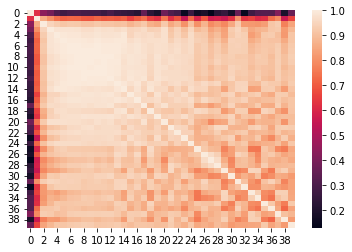

In [111]:
sns.heatmap(clusteredCorr.iloc[0:40, 0:40])

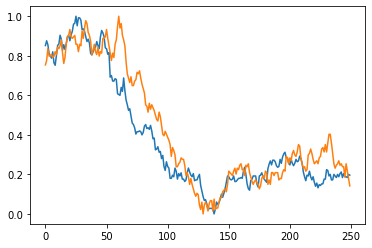

In [112]:
for i in range(53,55):
    x_s = prcNormalized[mapping[i]]
    plt.plot(y_s, x_s)

In [113]:
threshold = 0.8
clusters = []
curPoint = 0
J = set()
for i in range(100):
    J.add(i)
curCluster = set()
while len(J) > 0:
    maxCorr = 0
    maxPoint = 0
    for p1 in curCluster:
        for p2 in J:
            if abs(corr[p1][p2]) > maxCorr:
                maxCorr = abs(corr[p1][p2])
                maxPoint = p2
    J.remove(maxPoint)
    newClust= False
    for p1 in curCluster:
        if abs(corr[p1][maxPoint]) < threshold:
            clusters.append(curCluster)
            curCluster = set()
            curCluster.add(maxPoint)
            newClust= True
            break
    if not newClust:
        curCluster.add(maxPoint)
clusters.append(curCluster)
clusters

[{0, 21, 36, 44, 47, 49, 52, 57, 60, 74, 78},
 {1, 2, 12, 18, 29, 32, 40, 54, 68, 71, 76, 80, 89, 91, 92, 95},
 {6, 14, 31, 70, 97},
 {22, 39, 51},
 {15, 28, 46, 96},
 {34, 67, 87},
 {17, 63, 86},
 {58, 99},
 {16},
 {61},
 {35},
 {45},
 {93},
 {8, 23},
 {10, 26, 73},
 {7},
 {94},
 {59},
 {90},
 {11, 42},
 {5, 33, 62, 65},
 {72, 84},
 {41, 50, 55},
 {25, 69},
 {13},
 {48},
 {24},
 {30},
 {83},
 {20},
 {81},
 {27},
 {3},
 {79},
 {53},
 {77},
 {85},
 {43},
 {66},
 {38},
 {56},
 {19},
 {64},
 {75},
 {4},
 {82},
 {37},
 {9},
 {98},
 {88}]

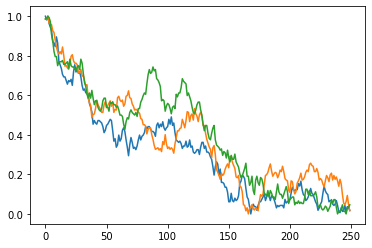

In [115]:
for i in clusters[3]:
    x_s = prcNormalized[i]
    plt.plot(y_s, x_s)